# IMPLEMENTACION DE ARBOLES DE DESICION

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()

In [6]:
X = iris.data
y = iris.target

In [21]:
# dividir conjunto de datos

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [43]:
# entrenar modelo
model = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

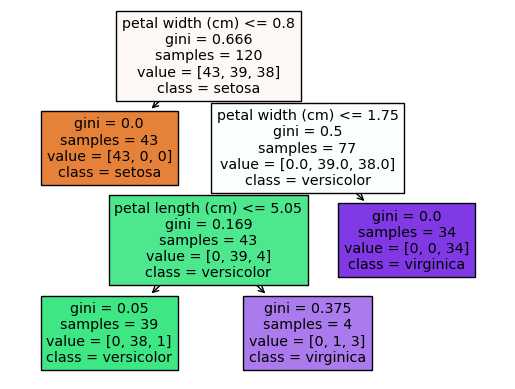

In [44]:
tree.plot_tree(model, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [45]:
y_pred =  model.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
print(classification_report(y_test,y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.91      0.91      0.91        11
   virginica       0.92      0.92      0.92        12

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [48]:
from sklearn.model_selection import GridSearchCV, KFold

parametros = {
    'ccp_alpha':[0.0,0.01,0.1],
    'max_depth': [None,2,3,4,5,10]
}

cv =  KFold(n_splits=10,shuffle=True)
pc_grid = GridSearchCV(model,parametros,cv=cv, scoring='accuracy')

# entrenar
pc_grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'max_depth': [None, 2, 3, 4, 5, 10]},
             scoring='accuracy')

In [49]:
pc_grid.best_params_

{'ccp_alpha': 0.0, 'max_depth': 3}